In [347]:
import numpy as np
import json
import os
import sys
import cv2

from tqdm import tqdm
import matplotlib.pyplot as plt

In [348]:
# Function definitions
def readJsonParameters(json_path, parameter):
    '''
    Read a json for parameters 
    '''
    with open(json_path) as json_file:
        json_str = json_file.read()
        parameter = json.loads(json_str)
    return parameter

def read_blender_lookup():
    filename = os.path.join(os.getcwd(), output_folder, lookup_folder, str(person_idx), str(trial_idx), "blender_lookup.npy")
    lookup = np.load(filename)
    return lookup

In [349]:

# Static variable Initializations

filespath_json_path = "FilePaths.json"

output_folder = "renderings"
observation_output_folder = "observation"
lookup_folder = "lookup"
lookup_filename = "blender_lookup.npy"

person_idx = 3
trial_idx = 1

start_frame= 25000
end_frame= 26200

# Variables for putText
font = cv2.FONT_HERSHEY_SIMPLEX
org = (1920-250, 1080-50)
fontScale = 1
color = 127
thickness = 5

In [350]:
plt.rcParams["figure.figsize"] = (20, 20)

In [351]:
#################
# Script starts #
#################

file_paths = []

file_paths = readJsonParameters(filespath_json_path, file_paths)

data_path = file_paths["DATA_PATH"]

In [352]:
# data_path = file_paths["DATA_PATH"]

# # Open lookup file and get the frame index and world index
# lookup_filename = os.path.join(os.getcwd(), output_folder, lookup_folder, str(person_idx), str(trial_idx), lookup_filename)
# if not os.path.exists(lookup_filename):
#     print('Failed to create real sync video. Blender lookup file does not exist at', lookup_filename, '! Re-run the RIT-Net pipeline to generate the lookup file.')
#     # sys.exit()

# lookup_table = np.load(lookup_filename)
# frame_indices = lookup_table[:, 0].astype(int)
# world_indices = lookup_table[:, 4].astype(int)

In [353]:
# Read the world video
data_directory = os.path.join(data_path, str(person_idx), str(trial_idx), 'exports')
world_filename = os.path.join(data_directory, 'world.mp4')

cap1 = cv2.VideoCapture(world_filename)

In [354]:
data_directory = os.path.join(data_path, str(person_idx), str(trial_idx))
world_filename = os.path.join(data_directory, 'world.mp4')

cap2 = cv2.VideoCapture(world_filename)

In [355]:
idx = 100

World index is : 6525
Done!
Done!


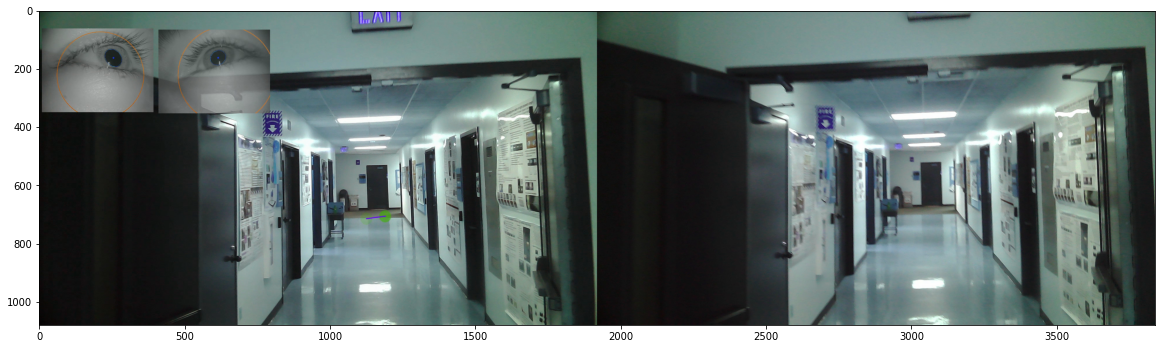

In [364]:
# cap_pos = world_indices[np.where(frame_indices==idx)[0][0]]
cap_pos = 6525
print('World index is :', cap_pos)

cap1.set(cv2.CAP_PROP_POS_FRAMES, cap_pos)

ret, frame1 = cap1.read()
if ret:
    # plt.imshow(frame1)
    print('Done!')
else:
    print('Could not get frame1')

cap2.set(cv2.CAP_PROP_POS_FRAMES, cap_pos)

ret, frame2 = cap2.read()
if ret:
    # plt.imshow(frame2)
    print('Done!')
else:
    print('Could not get frame2')

combined = []
combined = np.hstack((frame1, frame2))
plt.imshow(combined)

In [357]:
def show_stats(cap):
    print('Frame count:', int(cap.get(cv2. CAP_PROP_FRAME_COUNT)))
    print('FPS:', int(cap.get(cv2. CAP_PROP_FPS)))
    print('Total duration:', int(cap.get(cv2. CAP_PROP_FRAME_COUNT)) / int(cap.get(cv2. CAP_PROP_FPS)))

In [358]:
print('Cap1')
print('-'*20)
show_stats(cap1)
print('-'*20)
print('Cap2')
print('-'*20)
show_stats(cap2)

Cap1
--------------------
Frame count: 11390
FPS: 29
Total duration: 392.7586206896552
--------------------
Cap2
--------------------
Frame count: 11390
FPS: 30
Total duration: 379.6666666666667
